#**FINAL PROJECT**

##**Data Collection**

##**Import Libraries And Data**

In [1]:
pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c3fa9337835d7f6492331c19ff5acb07b9c4304fc3ef72474a691ecfb21891b5
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [5]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.0 MB 3.9 MB/s 
     |████████████████████████████████| 965 kB 25.2 MB/s 
     |████████████████████████████████| 591 kB 41.8 MB/s 
     |████████████████████████████████| 235 kB 51.5 MB/s 


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [8]:
from langdetect import detect

In [9]:
from underthesea import sent_tokenize
from underthesea import word_tokenize
from underthesea import pos_tag

from sklearn.feature_extraction.text import CountVectorizer

In [10]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df = pd.read_csv("/content/drive/Shareddrives/212IS2901_DAwP_Project/product_reviews.csv")

##**Data Understanding**

In [13]:
df.head()

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended
0,P501198,12241868735,4,NaN,This is very sweet and reminds me of Valentino...,1.0,2022-09-02T19:21:43.000+00:00,True
1,P501198,5945378767,5,NaN,I received this product as part of a promotion...,1.0,2022-08-31T12:37:28.000+00:00,True
2,P501198,12366338729,5,NaN,"PRADA I LOVE..\nThis perfume is incredible, su...",1.0,2022-08-31T10:51:25.000+00:00,True
3,P501198,5166716047,5,Must try!,I love the scent profile of this perfume! It h...,1.0,2022-08-30T18:10:44.000+00:00,True
4,P501198,2421462075,4,NaN,A bit too sweet for me. The vanilla scent is v...,1.0,2022-09-07T20:08:52.000+00:00,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190299 entries, 0 to 190298
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pd_id           190299 non-null  object 
 1   AuthorId        190299 non-null  object 
 2   Rating          190299 non-null  int64  
 3   Title           143472 non-null  object 
 4   ReviewText      190201 non-null  object 
 5   Helpfulness     92429 non-null   float64
 6   SubmissionTime  190299 non-null  object 
 7   IsRecommended   137268 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 11.6+ MB


###**Data description**



1.   **pd_id**: Product ID
2.   **AuthorId**: Customer ID
3.   **Rating**: Review's rating (1-5)
4.   **Title**: Review title (highlight)
5.   **ReviewText**: Review content 
6.   **Helpfulness**: Reliability of review rated by other customers (0-1.0)
7.   **SubmissionTime**: Review real time
8.   **IsRecommended**: Customer recommended others buy this product? (True/False)




###**Data Selection**

**DateTime Formating**

In [15]:
df["SubmissionTime"]=pd.to_datetime(df["SubmissionTime"])
df["SubmissionTime"]=df["SubmissionTime"].dt.strftime('%Y-%m-%d')
df["SubmissionTime"]=pd.to_datetime(df["SubmissionTime"])

**Drop NA value in Title and Helpfulness column**

In [16]:
df=df.dropna(subset=["Helpfulness"])
df=df.dropna(subset=["Title"])
df

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended
3,P501198,5166716047,5,Must try!,I love the scent profile of this perfume! It h...,1.000000,2022-08-30,True
5,P501198,9156933171,4,"Strong aroma, best for nights out",I was sponsored this product by influenster an...,1.000000,2022-08-29,True
6,P501198,1877173590,5,Love it,"Love this scent! It’s a warm, sweet floral, bu...",1.000000,2022-09-03,True
7,P501198,8033019218,5,Must have perfume!,I love the design of the bottle. I enjoy the s...,1.000000,2022-09-03,True
8,P501198,28803644813,5,Long-lasting fragrance!,I loved this perfume! I was nervous about a “s...,1.000000,2022-09-08,True
...,...,...,...,...,...,...,...,...
190249,P427744,22723742897,5,Feels light and airy… like Springtime.,This is a light and airy floral scent. It smel...,0.333333,2021-10-21,True
190250,P427744,7118361319,5,great for rose lovers,Such a pretty scent. If you’re a lover of rose...,0.333333,2018-02-23,True
190251,P427744,22215061991,3,NOT WORTH IT,Smells like bath and body works perfume and in...,0.214286,2021-01-08,False
190252,P427744,5115968192,1,just no,Smells so cheap like Bath and body works. So s...,0.200000,2021-02-19,False


**Select comments from 2017 to the latest 2022**

In [17]:
#Check for null values
df_review = df
df_review.isnull().sum()

pd_id                 0
AuthorId              0
Rating                0
Title                 0
ReviewText            0
Helpfulness           0
SubmissionTime        0
IsRecommended     23378
dtype: int64

In [18]:
df_review['SubmissionYear'] = df_review['SubmissionTime'].dt.year
df_review.head()

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended,SubmissionYear
3,P501198,5166716047,5,Must try!,I love the scent profile of this perfume! It h...,1.0,2022-08-30,True,2022
5,P501198,9156933171,4,"Strong aroma, best for nights out",I was sponsored this product by influenster an...,1.0,2022-08-29,True,2022
6,P501198,1877173590,5,Love it,"Love this scent! It’s a warm, sweet floral, bu...",1.0,2022-09-03,True,2022
7,P501198,8033019218,5,Must have perfume!,I love the design of the bottle. I enjoy the s...,1.0,2022-09-03,True,2022
8,P501198,28803644813,5,Long-lasting fragrance!,I loved this perfume! I was nervous about a “s...,1.0,2022-09-08,True,2022


In [19]:
df_review.drop(df_review[df_review['SubmissionYear'] < 2017].index, inplace = True)

In [20]:
df_review.reset_index(inplace=True, drop=True)
df_review

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended,SubmissionYear
0,P501198,5166716047,5,Must try!,I love the scent profile of this perfume! It h...,1.000000,2022-08-30,True,2022
1,P501198,9156933171,4,"Strong aroma, best for nights out",I was sponsored this product by influenster an...,1.000000,2022-08-29,True,2022
2,P501198,1877173590,5,Love it,"Love this scent! It’s a warm, sweet floral, bu...",1.000000,2022-09-03,True,2022
3,P501198,8033019218,5,Must have perfume!,I love the design of the bottle. I enjoy the s...,1.000000,2022-09-03,True,2022
4,P501198,28803644813,5,Long-lasting fragrance!,I loved this perfume! I was nervous about a “s...,1.000000,2022-09-08,True,2022
...,...,...,...,...,...,...,...,...,...
50015,P427744,22723742897,5,Feels light and airy… like Springtime.,This is a light and airy floral scent. It smel...,0.333333,2021-10-21,True,2021
50016,P427744,7118361319,5,great for rose lovers,Such a pretty scent. If you’re a lover of rose...,0.333333,2018-02-23,True,2018
50017,P427744,22215061991,3,NOT WORTH IT,Smells like bath and body works perfume and in...,0.214286,2021-01-08,False,2021
50018,P427744,5115968192,1,just no,Smells so cheap like Bath and body works. So s...,0.200000,2021-02-19,False,2021


> **The data obtained includes 50.020 comments, customer feedback in the period from 2017 to 2022**

##**EDA**

###**Remove outliners**

**Calculate the total number of words, the total number of characters and the average length of a word in the comment paragraph**



In [21]:
df_review['word_count'] = df_review['ReviewText'].apply(lambda x : len(x.split()))
df_review['char_count'] = df_review['ReviewText'].apply(lambda x : len(x.replace(" ","")))
df_review['avg_word_length'] = df_review['char_count'] / (df_review['word_count'])

stopword = stopwords.words('english')
df_review['stopwords'] = df_review['ReviewText'].apply(lambda x: len([x for x in x.split() if x in stopword]))

df_review.head()

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended,SubmissionYear,word_count,char_count,avg_word_length,stopwords
0,P501198,5166716047,5,Must try!,I love the scent profile of this perfume! It h...,1.0,2022-08-30,True,2022,23,117,5.086957,7
1,P501198,9156933171,4,"Strong aroma, best for nights out",I was sponsored this product by influenster an...,1.0,2022-08-29,True,2022,70,299,4.271429,28
2,P501198,1877173590,5,Love it,"Love this scent! It’s a warm, sweet floral, bu...",1.0,2022-09-03,True,2022,32,128,4.000000,12
3,P501198,8033019218,5,Must have perfume!,I love the design of the bottle. I enjoy the s...,1.0,2022-09-03,True,2022,23,86,3.739130,10
4,P501198,28803644813,5,Long-lasting fragrance!,I loved this perfume! I was nervous about a “s...,1.0,2022-09-08,True,2022,52,207,3.980769,22


**Plot boxplots to remove outliers**

In [22]:
df_EDA = df_review[['avg_word_length','stopwords']]
df_EDA.describe()
#'pd_id', 'AuthorId', , 'char_count'

,avg_word_length,stopwords
count,50020.000000,50020.000000
mean,4.377833,23.617553
std,0.612337,18.725260
min,2.800000,0.000000
25%,4.105263,11.000000
50%,4.333333,19.000000
75%,4.586957,31.000000
max,94.000000,304.000000


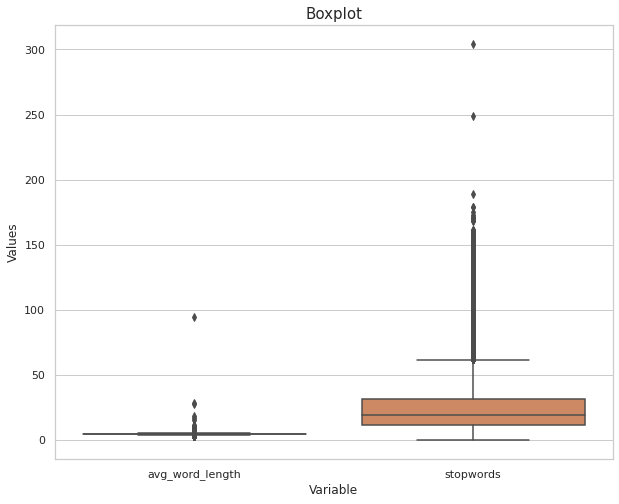

In [23]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_EDA)
plt.xlabel("Variable", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Boxplot", fontsize= 15)
plt.show()

In [24]:
df_char = df_review[['char_count', 'word_count']]
df_char.describe()

,char_count,word_count
count,50020.000000,50020.000000
mean,260.897641,60.114134
std,193.517880,44.354502
min,16.000000,1.000000
25%,134.000000,31.000000
50%,212.000000,49.000000
75%,329.000000,76.000000
max,3035.000000,696.000000


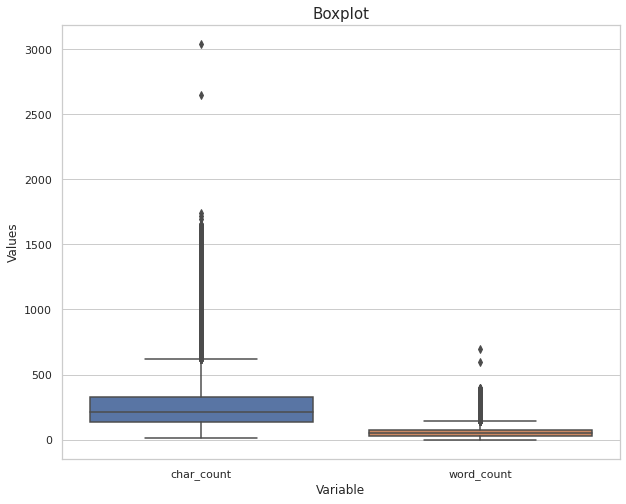

In [25]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_char)
plt.xlabel("Variable", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Boxplot", fontsize= 15)
plt.show()

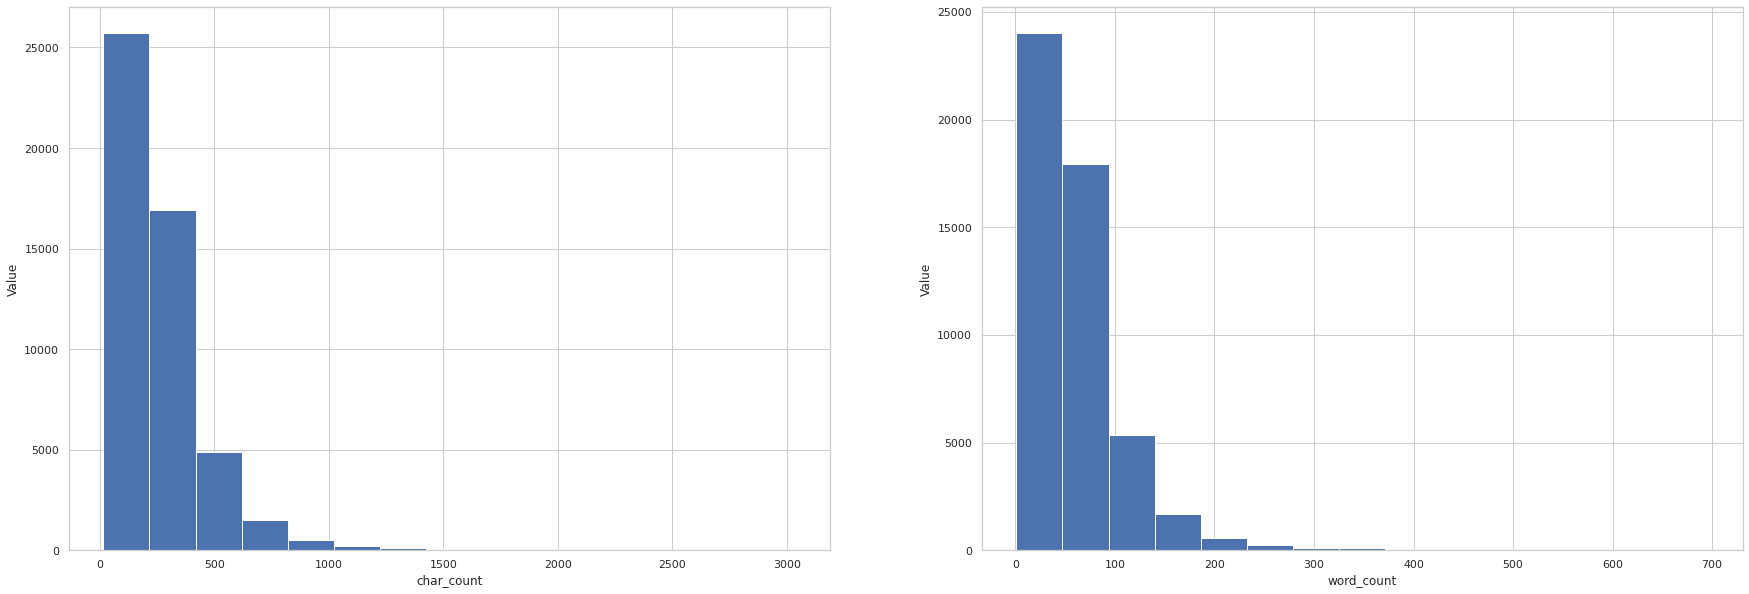

In [26]:
#Histogram
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (30,10))

#sns.set()
ax1.hist(df_char["char_count"],bins = 15)

ax1.set_xlabel("char_count")
ax1.set_ylabel("Value")

ax2.hist(df_char["word_count"], bins = 15)

ax2.set_xlabel("word_count")
ax2.set_ylabel("Value")

plt.show()

In [27]:
df1=df_review[df_review['avg_word_length']>=20]
df1[['ReviewText', 'word_count', 'char_count', 'avg_word_length', 'stopwords']]

,ReviewText,word_count,char_count,avg_word_length,stopwords
1550,Finished.........................................,1,94,94.00,0
29385,I love the smell................................,4,109,27.25,1
43864,https://youtu.be/jaEkh0spiYM,1,28,28.00,0


In [28]:
df2=df_review[df_review['word_count']>=500]
df2[['ReviewText', 'word_count', 'char_count', 'avg_word_length', 'stopwords']]

,ReviewText,word_count,char_count,avg_word_length,stopwords
30471,I got a sample of this through a department st...,696,3035,4.360632,304
47614,I hate to repeat what the reviewer below me ha...,599,2643,4.412354,249


In [29]:
df3=df_review[df_review['char_count']>=2000]
df3[['ReviewText', 'word_count', 'char_count', 'avg_word_length', 'stopwords']]

,ReviewText,word_count,char_count,avg_word_length,stopwords
30471,I got a sample of this through a department st...,696,3035,4.360632,304
47614,I hate to repeat what the reviewer below me ha...,599,2643,4.412354,249


In [30]:
df4=df_review[df_review['stopwords']>=200]
df4[['ReviewText', 'word_count', 'char_count', 'avg_word_length', 'stopwords']]

,ReviewText,word_count,char_count,avg_word_length,stopwords
30471,I got a sample of this through a department st...,696,3035,4.360632,304
47614,I hate to repeat what the reviewer below me ha...,599,2643,4.412354,249


In [31]:
df5=df_review[(df_review['word_count']>=500) | (df_review['char_count']>=2000) | (df_review['avg_word_length']>=20) 
             |(df_review['avg_word_length']<2) | (df_review['stopwords']>=200)]

df5[['ReviewText', 'word_count', 'char_count', 'avg_word_length', 'stopwords']]

,ReviewText,word_count,char_count,avg_word_length,stopwords
1550,Finished.........................................,1,94,94.000000,0
29385,I love the smell................................,4,109,27.250000,1
30471,I got a sample of this through a department st...,696,3035,4.360632,304
43864,https://youtu.be/jaEkh0spiYM,1,28,28.000000,0
47614,I hate to repeat what the reviewer below me ha...,599,2643,4.412354,249


In [32]:
#Remove outliers
df_review.drop(df_review[df_review['word_count'] >= 500].index, inplace = True)
df_review.drop(df_review[df_review['char_count'] >= 2000].index, inplace = True)
df_review.drop(df_review[df_review['avg_word_length'] >= 20].index, inplace = True)
df_review.drop(df_review[df_review['avg_word_length'] < 2].index, inplace = True)
df_review.drop(df_review[df_review['stopwords'] >= 200].index, inplace = True)

df_review.head()

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended,SubmissionYear,word_count,char_count,avg_word_length,stopwords
0,P501198,5166716047,5,Must try!,I love the scent profile of this perfume! It h...,1.0,2022-08-30,True,2022,23,117,5.086957,7
1,P501198,9156933171,4,"Strong aroma, best for nights out",I was sponsored this product by influenster an...,1.0,2022-08-29,True,2022,70,299,4.271429,28
2,P501198,1877173590,5,Love it,"Love this scent! It’s a warm, sweet floral, bu...",1.0,2022-09-03,True,2022,32,128,4.000000,12
3,P501198,8033019218,5,Must have perfume!,I love the design of the bottle. I enjoy the s...,1.0,2022-09-03,True,2022,23,86,3.739130,10
4,P501198,28803644813,5,Long-lasting fragrance!,I loved this perfume! I was nervous about a “s...,1.0,2022-09-08,True,2022,52,207,3.980769,22


###**Exploratory Data Analysis**

In [33]:
df_author = pd.DataFrame(
    {'Count_AuthorId' : df_review.groupby(by = ['AuthorId'])['ReviewText'].count()}
).reset_index()
df_author.sort_values(ascending = True, by='Count_AuthorId')

,AuthorId,Count_AuthorId
0,0707bf2f79cd8edb8c1240fa9c993f0e770dffa3,1
23038,5231350529,1
23037,5231259674,1
23036,5231082273,1
23035,5230955514,1
...,...,...
3741,12050114099,37
1520,10783857043,38
2887,11528324542,45
9952,1930716686,47


In [34]:
df_author.describe()

,Count_AuthorId
count,36891.000000
mean,1.355751
std,1.290572
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,88.000000


> There are 36.891 customers participating in product comments in the dataset with at least 1 comment and at most 88 comments

In [35]:
df_product = pd.DataFrame(
    {'Count_comments' : df_review.groupby(by = ['pd_id'])['ReviewText'].count()}
).reset_index()
df_product.sort_values(ascending = True, by='Count_comments')

,pd_id,Count_comments
537,P500431,1
585,P502287,1
470,P481182,1
597,P503061,1
483,P482023,1
...,...,...
283,P448102,701
122,P404758,727
201,P428713,749
209,P429621,769


In [36]:
df_product.describe()

,Count_comments
count,613.000000
mean,81.590538
std,118.437363
min,1.000000
25%,12.000000
50%,40.000000
75%,104.000000
max,891.000000


> The total number of products in the dataset is 613 products. The number of comments for a product is at least 1 and at most 891 comments

In [37]:
df_year = pd.DataFrame(
    {'Comments_year' : df_review.groupby(by = ['SubmissionYear'])['ReviewText'].count()}
).reset_index()
df_year.sort_values(by='Comments_year')

,SubmissionYear,Comments_year
1,2018,3203
0,2017,3298
2,2019,4697
3,2020,10627
5,2022,12699
4,2021,15491


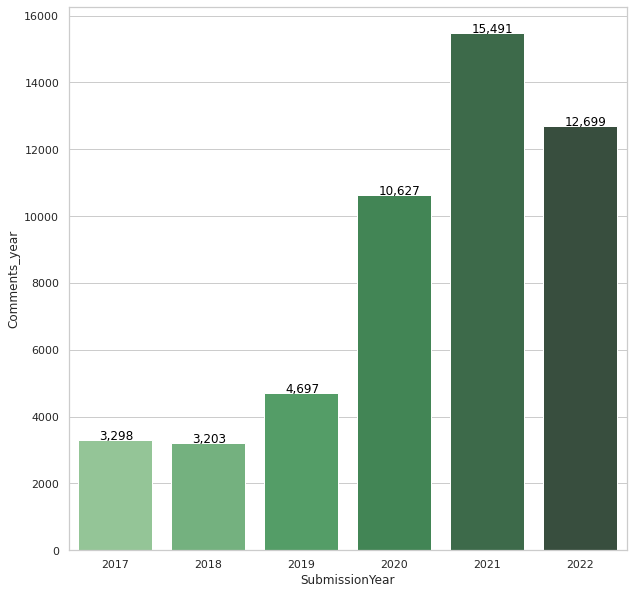

In [38]:
plt.figure(figsize=(10,10))
ax1 = sns.barplot(data=df_year, x='SubmissionYear', y='Comments_year',palette='Greens_d')
for index, value in enumerate(df_year['Comments_year']):
    ax1.text(index - .17, value + 10, "{:,.0f}".format(value), color='black');

> Comments in 2021 account for the largest number of comments with 15.491 comments. 2018 has the lowest number of comments with 3.203 comments

##**Data Labeling**

###**Rating Checking**

In [39]:
rating_df_eda = pd.DataFrame({'Review': df_review.groupby (by = 'Rating')['ReviewText'].count()}).reset_index()
rating_df_eda

,Rating,Review
0,1,4208
1,2,3419
2,3,4956
3,4,7547
4,5,29885


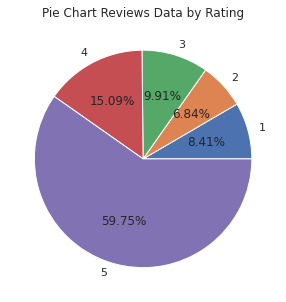

In [40]:
fig,(ax)= plt.subplots(figsize=(5,5))
ax.pie(rating_df_eda['Review'], labels = rating_df_eda['Rating'], autopct='%1.2f%%')
ax.set(title = 'Pie Chart Reviews Data by Rating')
plt.show()

> Almost review is positive (5 star reviews account for 59.75%) => **Imbalanced Data**



In [41]:
col_group = ['Rating', 'IsRecommended']
df_rating=pd.DataFrame(
    {
        'Review':df_review.groupby(by = col_group, axis=0)['ReviewText'].count()
    }
)
df_rating

Review
Rating IsRecommended        
1      False            3860
       True               51
2      False            3095
       True              178
3      False            2906
       True             1843
4      False             329
       True             6893
5      False              54
       True            28314

####**Insight**

After group reviews by Rating and IsRecommended, we can see that:
- Almost negative review (1 and 2 star) IsRecommended is False (they discourage others from buying these products)
- Almost positive review (4 and 5 star) IsRecommended is True (they encourage others to buy these products)
- On the other hand, customers who rated 3 star (neutral) did not pretty clear like that (2902 - 61% IsRecommended is False and  1836 - 39% IsRecommended is True)


> **We can remove some minorities by IsRecommended**



###**Data Labeling**

In [42]:
rating = df_review["Rating"].values
sentiment = []
for i in rating:
    if i >3 :
        sentiment.append('Positive')
    else:
        sentiment.append('Negative')
df_review["Sentiment"] = sentiment
df_review.head()

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended,SubmissionYear,word_count,char_count,avg_word_length,stopwords,Sentiment
0,P501198,5166716047,5,Must try!,I love the scent profile of this perfume! It h...,1.0,2022-08-30,True,2022,23,117,5.086957,7,Positive
1,P501198,9156933171,4,"Strong aroma, best for nights out",I was sponsored this product by influenster an...,1.0,2022-08-29,True,2022,70,299,4.271429,28,Positive
2,P501198,1877173590,5,Love it,"Love this scent! It’s a warm, sweet floral, bu...",1.0,2022-09-03,True,2022,32,128,4.000000,12,Positive
3,P501198,8033019218,5,Must have perfume!,I love the design of the bottle. I enjoy the s...,1.0,2022-09-03,True,2022,23,86,3.739130,10,Positive
4,P501198,28803644813,5,Long-lasting fragrance!,I loved this perfume! I was nervous about a “s...,1.0,2022-09-08,True,2022,52,207,3.980769,22,Positive


###**Review Labeling**

In [43]:
df_negative=df_review[ df_review["Sentiment"] == "Negative" ]
df_negative.head()

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended,SubmissionYear,word_count,char_count,avg_word_length,stopwords,Sentiment
5,P501198,21382487952,3,Wanted to love this so bad...,I was planning to get Donna Born in Roma but I...,1.0,2022-09-08,False,2022,132,518,3.924242,50,Negative
8,P501198,8917999263,3,It’s okay,i received this product free from influenster ...,1.0,2022-09-13,True,2022,42,177,4.214286,21,Negative
12,P501198,5736895098,3,Too sweet and overwhelming,I received this free for testing purposes from...,1.0,2022-09-01,True,2022,48,212,4.416667,25,Negative
18,P501198,38927194093,3,Wish it lasted longer,I received this product for free from Sephora ...,1.0,2022-09-17,True,2022,89,352,3.955056,40,Negative
40,P501198,1589646522,3,Nice but not a must have for me,"I love an amber based, musky smell. And this o...",1.0,2022-09-08,False,2022,55,220,4.000000,18,Negative


In [44]:
df_positive=df_review[ df_review["Sentiment"] == "Positive" ]
df_positive.head()

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended,SubmissionYear,word_count,char_count,avg_word_length,stopwords,Sentiment
0,P501198,5166716047,5,Must try!,I love the scent profile of this perfume! It h...,1.0,2022-08-30,True,2022,23,117,5.086957,7,Positive
1,P501198,9156933171,4,"Strong aroma, best for nights out",I was sponsored this product by influenster an...,1.0,2022-08-29,True,2022,70,299,4.271429,28,Positive
2,P501198,1877173590,5,Love it,"Love this scent! It’s a warm, sweet floral, bu...",1.0,2022-09-03,True,2022,32,128,4.000000,12,Positive
3,P501198,8033019218,5,Must have perfume!,I love the design of the bottle. I enjoy the s...,1.0,2022-09-03,True,2022,23,86,3.739130,10,Positive
4,P501198,28803644813,5,Long-lasting fragrance!,I loved this perfume! I was nervous about a “s...,1.0,2022-09-08,True,2022,52,207,3.980769,22,Positive


In [45]:
sentiment_df_eda = pd.DataFrame({'Review': df_review.groupby (by = 'Sentiment')['Rating'].count()}).reset_index()
sentiment_df_eda

,Sentiment,Review
0,Negative,12583
1,Positive,37432


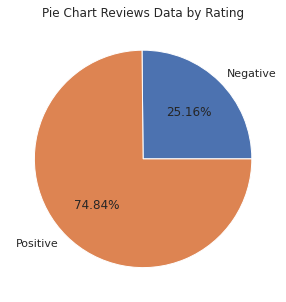

In [46]:
fig,(ax)= plt.subplots(figsize=(5,5))
ax.pie(sentiment_df_eda['Review'], labels = sentiment_df_eda['Sentiment'], autopct='%1.2f%%')
ax.set(title = 'Pie Chart Reviews Data by Rating')
plt.show()

In [47]:
col_group = ['SubmissionYear', 'Rating']
df_rating = pd.DataFrame(
    {
        'Review': df_review.groupby(by = col_group)['ReviewText'].count()
    }
    
).reset_index()
df_rating.head()

,SubmissionYear,Rating,Review
0,2017,1,366
1,2017,2,199
2,2017,3,255
3,2017,4,418
4,2017,5,2060


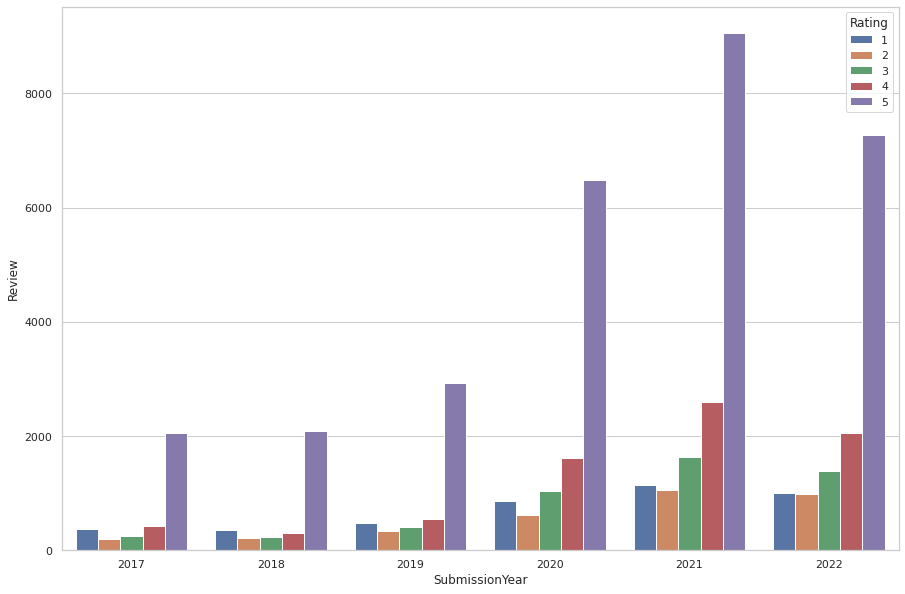

In [48]:
plt.figure(figsize = (15,10))
sns.barplot(data = df_rating, x= 'SubmissionYear', y ='Review', hue = 'Rating')

In [49]:
col_group = ['SubmissionYear', 'Sentiment']
df_rating = pd.DataFrame(
    {
        'Review': df_review.groupby(by = col_group)['ReviewText'].count()
    }
    
).reset_index()
df_rating.head()

,SubmissionYear,Sentiment,Review
0,2017,Negative,820
1,2017,Positive,2478
2,2018,Negative,812
3,2018,Positive,2391
4,2019,Negative,1226


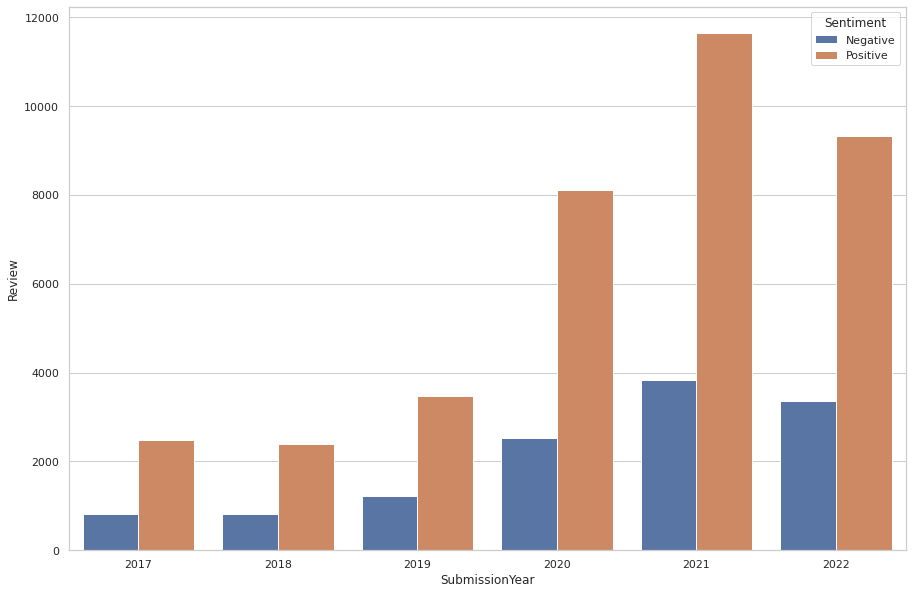

In [50]:
plt.figure(figsize = (15,10))
sns.barplot(data = df_rating, x= 'SubmissionYear', y ='Review', hue = 'Sentiment')

##**Data Pre-Processing**

###**Build Functions**

In [51]:
#Remove Punctuation (!"#$%,...)
def remove_punctuation(text):
  punc = string.punctuation
  return text.translate(str.maketrans('', '', punc))

In [52]:
#Remove special character
def remove_special_char(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = ''.join([i for i in text if not i.isdigit()])
    return text

In [53]:
stop_words = set(stopwords.words('english'))

In [54]:
#Remove Stopwords
def remove_stopword(text):
  words = nltk.word_tokenize(text)
  words = [w for w in words if not w in stop_words]
  return  " ".join(words)

In [55]:
from collections import defaultdict
from nltk.corpus import wordnet as wn

In [56]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [57]:
#Lemmatization
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word,tag_map[tag[0]]) for word, tag in pos_tag(text)])

In [58]:
from textblob import TextBlob
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [59]:
#Get Adj in comments
def get_adj(text):
    blob = TextBlob(text)
    return " ".join([word for (word,tag) in blob.tags if tag.startswith("JJ")])

In [60]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [61]:
def remove_non_english(text):
  return  " ".join(w for w in nltk.wordpunct_tokenize(text) \
         if w.lower() in words or not w.isalpha())

###**Transform Word Function**

In [62]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant
import enchant, difflib, nltk
from nltk.tokenize import word_tokenize

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [98.9 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [992 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports In

In [63]:
def word_suggest(word):
    d = enchant.Dict("en_US")
    if d.check(word):
        return word
    best_words = []
    best_ratio = 0
    a = set(d.suggest(word))
    for b in a:
        tmp = difflib.SequenceMatcher(None, word, b).ratio()
        if tmp > best_ratio:
            best_words = [b]
            best_ratio = tmp
        elif tmp == best_ratio:
            best_words.append(b)
    return best_words[0]

###**Review processed**

In [64]:
#Convert to lowercase
df_review['Review_Process'] = df_review['ReviewText'].str.lower()
#Remove Punctuation
df_review['Review_Process'] = df_review['Review_Process'].apply(lambda x: remove_punctuation(x))
#Remove special character
df_review['Review_Process'] = df_review['Review_Process'].apply(lambda x: remove_special_char(x))
#Remove Stopwords
df_review['Review_Process'] = df_review['Review_Process'].apply(lambda x: remove_stopword(x))

In [65]:
df_review['Review_Final'] = df_review['Review_Process'].apply(lambda x: remove_non_english(x))

In [66]:
#Lemmatize Words
df_review['Review_Final'] = df_review['Review_Final'].apply(lambda x: lemmatize_words(x))

In [67]:
df_review['Review_Final'] = df_review['Review_Final'].apply(lambda x: get_adj(x))

In [68]:
#df_review['Review_Final'] = df_review['Review_Final'].apply(lambda x: " ".join(word_suggest(word) for word in word_tokenize(x)))
df_review.head()

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended,SubmissionYear,word_count,char_count,avg_word_length,stopwords,Sentiment,Review_Process,Review_Final
0,P501198,5166716047,5,Must try!,I love the scent profile of this perfume! It h...,1.0,2022-08-30,True,2022,23,117,5.086957,7,Positive,love scent profile perfume nice floral notes o...,nice floral slight
1,P501198,9156933171,4,"Strong aroma, best for nights out",I was sponsored this product by influenster an...,1.0,2022-08-29,True,2022,70,299,4.271429,28,Positive,sponsored product influenster prada compliment...,complimentary give let high strong strong
2,P501198,1877173590,5,Love it,"Love this scent! It’s a warm, sweet floral, bu...",1.0,2022-09-03,True,2022,32,128,4.000000,12,Positive,love scent warm sweet floral smells like somet...,warm sweet floral wear ton
3,P501198,8033019218,5,Must have perfume!,I love the design of the bottle. I enjoy the s...,1.0,2022-09-03,True,2022,23,86,3.739130,10,Positive,love design bottle enjoy scent noticed long we...,enjoy good
4,P501198,28803644813,5,Long-lasting fragrance!,I loved this perfume! I was nervous about a “s...,1.0,2022-09-08,True,2022,52,207,3.980769,22,Positive,loved perfume nervous spicy scent blended well...,nervous natural good


###**Remove common words on positive and negative**

In [69]:
df_negative = df_review[df_review["Sentiment"] == "Negative"]
df_positive = df_review[df_review["Sentiment"] == "Positive"]

In [70]:
from collections import Counter
word_count_pos = Counter()
for text in df_positive['Review_Final']:
    for word in text.split():
        word_count_pos[word] += 1

In [71]:
from collections import Counter
word_count_neg = Counter()
for text in df_negative['Review_Final']:
    for word in text.split():
        word_count_neg[word] += 1

In [72]:
word_pos = set(word for (word, wc) in word_count_pos.most_common(30))
word_pos

{'beautiful',
 'best',
 'clean',
 'different',
 'favorite',
 'first',
 'floral',
 'free',
 'fresh',
 'full',
 'good',
 'great',
 'last',
 'light',
 'little',
 'long',
 'many',
 'much',
 'new',
 'nice',
 'perfect',
 'perfume',
 'sample',
 'scent',
 'soft',
 'strong',
 'sweet',
 'unique',
 'warm',
 'wear'}

In [73]:
word_neg = set(word for (word, wc) in word_count_neg.most_common(30))
word_neg

{'bad',
 'beautiful',
 'cheap',
 'clean',
 'different',
 'first',
 'floral',
 'free',
 'fresh',
 'full',
 'good',
 'great',
 'heavy',
 'last',
 'light',
 'little',
 'long',
 'many',
 'much',
 'nice',
 'old',
 'original',
 'perfume',
 'sample',
 'scent',
 'strong',
 'sure',
 'sweet',
 'warm',
 'wear'}

In [74]:
common_s =  set(word_pos) & set(word_neg)
common_s

{'beautiful',
 'clean',
 'different',
 'first',
 'floral',
 'free',
 'fresh',
 'full',
 'good',
 'great',
 'last',
 'light',
 'little',
 'long',
 'many',
 'much',
 'nice',
 'perfume',
 'sample',
 'scent',
 'strong',
 'sweet',
 'warm',
 'wear'}

In [75]:
def remove_freq_words(text):
    return " ".join([word for word in text.split() if word not in common_s])

In [76]:
df_review['Review_Final'] = df_review['Review_Final'].apply(lambda x: remove_freq_words(x))
df_review.head()

,pd_id,AuthorId,Rating,Title,ReviewText,Helpfulness,SubmissionTime,IsRecommended,SubmissionYear,word_count,char_count,avg_word_length,stopwords,Sentiment,Review_Process,Review_Final
0,P501198,5166716047,5,Must try!,I love the scent profile of this perfume! It h...,1.0,2022-08-30,True,2022,23,117,5.086957,7,Positive,love scent profile perfume nice floral notes o...,slight
1,P501198,9156933171,4,"Strong aroma, best for nights out",I was sponsored this product by influenster an...,1.0,2022-08-29,True,2022,70,299,4.271429,28,Positive,sponsored product influenster prada compliment...,complimentary give let high
2,P501198,1877173590,5,Love it,"Love this scent! It’s a warm, sweet floral, bu...",1.0,2022-09-03,True,2022,32,128,4.000000,12,Positive,love scent warm sweet floral smells like somet...,ton
3,P501198,8033019218,5,Must have perfume!,I love the design of the bottle. I enjoy the s...,1.0,2022-09-03,True,2022,23,86,3.739130,10,Positive,love design bottle enjoy scent noticed long we...,enjoy
4,P501198,28803644813,5,Long-lasting fragrance!,I loved this perfume! I was nervous about a “s...,1.0,2022-09-08,True,2022,52,207,3.980769,22,Positive,loved perfume nervous spicy scent blended well...,nervous natural


##**TF-IDF**

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
# initialize the vectorizer
tf_idf = TfidfVectorizer()
# fit_transform applies TF-IDF to cleaned texts
response = tf_idf.fit_transform(df_review['Review_Final'])
print("n_samples: %d, n_features: %d" % response.shape)

n_samples: 50015, n_features: 5225


In [79]:
print(tf_idf.get_feature_names())

['aa', 'abandon', 'abbey', 'abbot', 'able', 'abnormal', 'abrasive', 'abrupt', 'absent', 'absinthe', 'absolute', 'absolutely', 'absorb', 'absorbed', 'abstract', 'absurd', 'abundant', 'abysmal', 'academic', 'accelerate', 'accent', 'accept', 'acceptable', 'accepted', 'accessibility', 'accessible', 'accessory', 'accident', 'accidental', 'accompaniment', 'accomplish', 'accomplished', 'accord', 'accumulate', 'accurate', 'accustom', 'accustomed', 'ache', 'acid', 'acidic', 'acidity', 'acne', 'acquired', 'acrid', 'act', 'active', 'actress', 'actual', 'adamant', 'adapt', 'adaptable', 'adaptive', 'add', 'added', 'addendum', 'addict', 'addicted', 'additional', 'additive', 'address', 'adequate', 'adhesive', 'adjacent', 'adjective', 'adjust', 'admirable', 'admire', 'admired', 'admiring', 'admit', 'adolescent', 'adorable', 'adore', 'adornment', 'adult', 'advance', 'advantage', 'adventurous', 'adverse', 'advertise', 'advertisement', 'advice', 'advisable', 'advise', 'aerial', 'aerie', 'aerosol', 'aesth

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [80]:
df_results = pd.DataFrame(response.toarray(), columns=tf_idf.get_feature_names_out())
df_results

,aa,abandon,abbey,abbot,able,abnormal,abrasive,abrupt,absent,absinthe,...,youthful,youthfulness,youve,yr,yuck,yucky,yummy,zest,zesty,zippy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##**Applying Model**

In [81]:
df_review["Sentiment"].replace({'Negative':0,'Positive': 1}, inplace = True)

In [82]:
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score
from time import time

In [83]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df_review['Review_Final'],df_review['Sentiment'],test_size=0.2)

###**Support Vector Machine**

In [84]:
tf_idf.fit_transform(df_review['Review_Final'])
x_train_tfidf = tf_idf.fit_transform(x_train)
x_test_tfidf = tf_idf.transform(x_test)

In [85]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', probability=True)

#Calculate training time
t0 = time()
SVM.fit(x_train_tfidf, y_train)
svm_training_time = round(time()-t0, 3)

#Calculate predict time
t0 = time()
# Predict labels based on validation dataset
svm_pred = SVM.predict(x_test_tfidf)
svm_predict_time = round(time()-t0, 3)

###**Navie Bayes**

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
#naive bayes classifier
naive_bayes_classifier = MultinomialNB()

t0 = time()
naive_bayes_classifier.fit(x_train_tfidf, y_train)
bayes_training_time = round(time()-t0, 3)

In [88]:
#predicted y
t0 = time()
nbayes_pred = naive_bayes_classifier.predict(x_test_tfidf)
bayes_predict_time = round(time()-t0, 3)

###**Logistic Regression**

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
# Train the model
LR = LogisticRegression(max_iter = 3000)

t0 = time()
LR.fit(x_train_tfidf, y_train)
lr_training_time = str(round(time()-t0, 3))

In [91]:
# making predictions on the testing set
t0 = time()
LR_pred = LR.predict(x_test_tfidf)
lr_predict_time = round(time()-t0, 3)

##**Evaluation**

### **Accuracy, Precision, Recall, F1-score**

In [92]:
metrics = pd.DataFrame(
        index = ['Accuracy', 'Precision', 'Recall', 'F1-score'],
        columns = ['SVM', 'Bayes', 'Logistic']
)

In [93]:
metrics.loc['Accuracy','SVM'] = accuracy_score(y_test, svm_pred)
metrics.loc['Precision', 'SVM'] = precision_score(y_test, svm_pred)
metrics.loc['Recall','SVM'] = recall_score(y_test, svm_pred)
metrics.loc['F1-score','SVM'] = f1_score(y_test, svm_pred)
metrics.loc['Training time','SVM'] = svm_training_time
metrics.loc['Predict time','SVM'] = svm_predict_time
metrics.loc['Accuracy','Bayes'] = accuracy_score(y_test, nbayes_pred)
metrics.loc['Precision','Bayes'] = precision_score(y_test, nbayes_pred)
metrics.loc['Recall','Bayes'] = recall_score(y_test, nbayes_pred)
metrics.loc['F1-score','Bayes'] = f1_score(y_test, nbayes_pred)
metrics.loc['Training time','Bayes'] = bayes_training_time
metrics.loc['Predict time','Bayes'] = bayes_predict_time
metrics.loc['Accuracy','Logistic'] = accuracy_score(y_test, LR_pred)
metrics.loc['Precision','Logistic'] = precision_score(y_test, LR_pred)
metrics.loc['Recall','Logistic'] = recall_score(y_test, LR_pred)
metrics.loc['F1-score','Logistic'] = f1_score(y_test, LR_pred)
metrics.loc['Training time','Logistic'] = lr_training_time
metrics.loc['Predict time','Logistic'] = lr_predict_time
metrics

,SVM,Bayes,Logistic
Accuracy,0.80066,0.794962,0.805258
Precision,0.806961,0.7916,0.813605
Recall,0.964037,0.98516,0.959358
F1-score,0.878533,0.877837,0.880491
Training time,367.866,0.014,0.968
Predict time,7.143,0.004,0.001


### **Confusion Matrix**

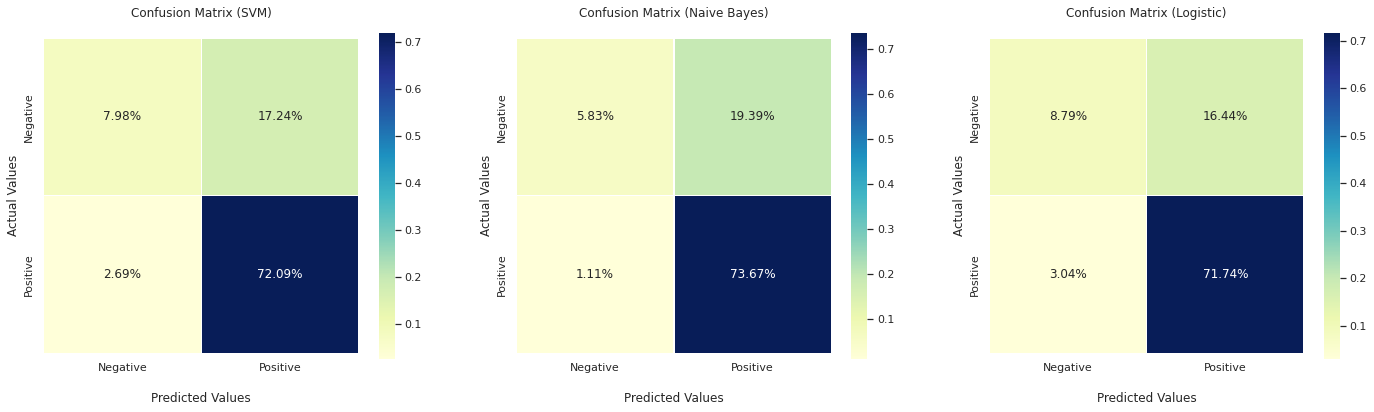

In [94]:
fig, axes = plt.subplots(ncols = 3, figsize = (24,6))

#Confusion matrix (Model 1)
svm_cf_matrix = confusion_matrix(y_test, svm_pred)
sns.heatmap(svm_cf_matrix/np.sum(svm_cf_matrix), annot=True, square = True, linewidth = .5, cmap='YlGnBu', fmt='.2%', ax = axes[0])
axes[0].set(title = 'Confusion Matrix (SVM)\n', xlabel = '\nPredicted Values', ylabel = 'Actual Values')

axes[0].xaxis.set_ticklabels(['Negative','Positive'])
axes[0].yaxis.set_ticklabels(['Negative','Positive']);

#Confusion matrix (Model 2)
cnf_matrix = confusion_matrix(y_test,nbayes_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, square = True, linewidth = .5, cmap='YlGnBu', fmt='.2%', ax = axes[1])
axes[1].set(title = 'Confusion Matrix (Naive Bayes)\n', xlabel = '\nPredicted Values', ylabel = 'Actual Values')

axes[1].xaxis.set_ticklabels(['Negative','Positive'])
axes[1].yaxis.set_ticklabels(['Negative','Positive'])

#Confusion matrix (Model 3)
LR_cnf_matrix = confusion_matrix(y_test,LR_pred)
sns.heatmap(LR_cnf_matrix/np.sum(LR_cnf_matrix), annot=True, square = True, linewidth = .5, cmap='YlGnBu', fmt='.2%', ax = axes[2])
axes[2].set(title = 'Confusion Matrix (Logistic)\n', xlabel = '\nPredicted Values', ylabel = 'Actual Values')

axes[2].xaxis.set_ticklabels(['Negative','Positive'])
axes[2].yaxis.set_ticklabels(['Negative','Positive']);

### **AUC**

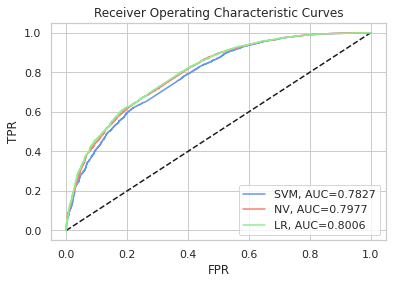

SVM: 
              precision    recall  f1-score   support

           0       0.75      0.32      0.44      2523
           1       0.81      0.96      0.88      7480

    accuracy                           0.80     10003
   macro avg       0.78      0.64      0.66     10003
weighted avg       0.79      0.80      0.77     10003

Navie Bayes: 
              precision    recall  f1-score   support

           0       0.84      0.23      0.36      2523
           1       0.79      0.99      0.88      7480

    accuracy                           0.79     10003
   macro avg       0.82      0.61      0.62     10003
weighted avg       0.80      0.79      0.75     10003

Logistic: 
              precision    recall  f1-score   support

           0       0.74      0.35      0.47      2523
           1       0.81      0.96      0.88      7480

    accuracy                           0.81     10003
   macro avg       0.78      0.65      0.68     10003
weighted avg       0.80      0.81      0.78

In [95]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
y_prob_SVM = SVM.predict_proba(x_test_tfidf)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_prob_SVM)

y_prob_NB = naive_bayes_classifier.predict_proba(x_test_tfidf)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_prob_NB)

y_prod_LR = LR.predict_proba(x_test_tfidf)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_prod_LR)

auc_SVM = roc_auc_score(y_test, y_prob_SVM)
auc_NB = roc_auc_score(y_test, y_prob_NB)
auc_LR = roc_auc_score(y_test, y_prod_LR)

plt.plot([0,1],[0,1], 'k--')

plt.plot(fpr1,tpr1,label="SVM, AUC="+ str(round(auc_SVM, 4)), color = 'cornflowerblue')
plt.plot(fpr2,tpr2,label="NV, AUC="+ str(round(auc_NB, 4)), color = 'salmon')
plt.plot(fpr3,tpr3,label="LR, AUC="+ str(round(auc_LR, 4)), color = 'lightgreen')

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic Curves')
plt.show()

print("SVM: \n" + classification_report(y_test, svm_pred))
print("Navie Bayes: \n" + classification_report(y_test, nbayes_pred))
print("Logistic: \n" + classification_report(y_test, LR_pred))

##**Visualization**

In [115]:
df_visual = df_review[['ReviewText', 'Rating', 'SubmissionYear', 'Review_Process', 'Review_Final']]
df_visual.head()

,ReviewText,Rating,SubmissionYear,Review_Process,Review_Final
0,I love the scent profile of this perfume! It h...,5,2022,love scent profile perfume nice floral notes o...,slight
1,I was sponsored this product by influenster an...,4,2022,sponsored product influenster prada compliment...,complimentary give let high
2,"Love this scent! It’s a warm, sweet floral, bu...",5,2022,love scent warm sweet floral smells like somet...,ton
3,I love the design of the bottle. I enjoy the s...,5,2022,love design bottle enjoy scent noticed long we...,enjoy
4,I loved this perfume! I was nervous about a “s...,5,2022,loved perfume nervous spicy scent blended well...,nervous natural


### **POS**

In [116]:
blob = TextBlob(str(df_visual['Review_Process']))
blob

TextBlob("0        love scent profile perfume nice floral notes o...
1        sponsored product influenster prada compliment...
2        love scent warm sweet floral smells like somet...
3        love design bottle enjoy scent noticed long we...
4        loved perfume nervous spicy scent blended well...
                               ...                        
50015    light airy floral scent smells like roses feel...
50016    pretty scent lover roses wish lingered longer ...
50017    smells like bath body works perfume insanely s...
50018              smells cheap like bath body works awful
50019    love smell wish lasted little longer small siz...
Name: Review_Process, Length: 50015, dtype: object")

In [117]:
pos_df = pd.DataFrame(blob.tags, columns = ['words','pos'])
pos_df

,words,pos
0,0,CD
1,love,NN
2,scent,NN
3,profile,NN
4,perfume,NN
...,...,...
85,Review_Process,NN
86,Length,NNP
87,50015,CD
88,dtype,NN


In [118]:
pos_count = pd.DataFrame(pos_df['pos'].value_counts()).reset_index()
pos_count

,index,pos
0,NN,30
1,JJ,19
2,CD,11
3,NNS,6
4,RB,5
5,VBP,4
6,IN,4
7,VBD,3
8,VBZ,3
9,VBN,2


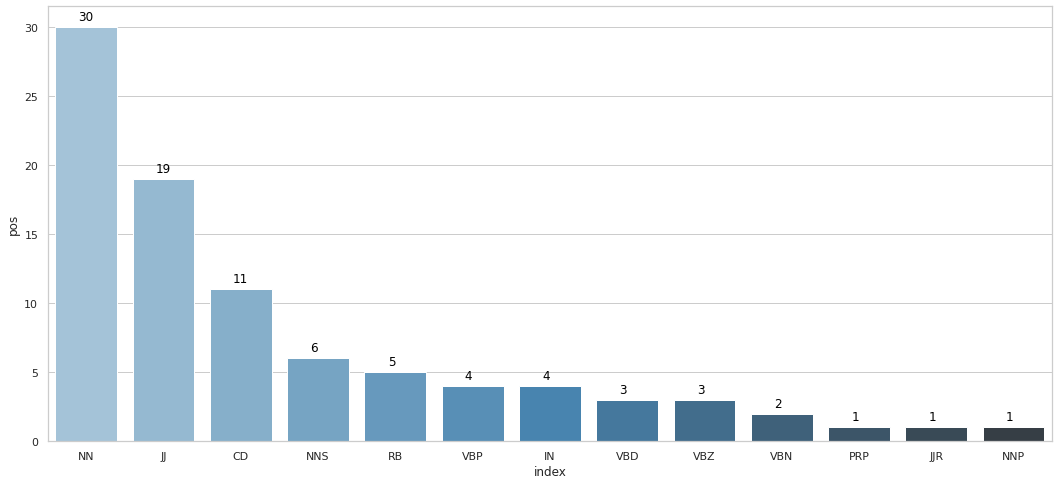

In [119]:
plt.figure(figsize=(18,8))
ax3 = sns.barplot(data = pos_count, x='index', y='pos',palette='Blues_d')
for index, value in enumerate(pos_count['pos']):
    ax3.text(index - .10, value + 0.5, "{:,.0f}".format(value), color='black');

### **Sentiment**

In [120]:
df_negative=df_review[df_review["Sentiment"] == 0]
df_positive=df_review[df_review["Sentiment"] == 1]

In [121]:
df_count_negative = pd.DataFrame(
    {'Count' : df_negative.groupby(by = ['SubmissionYear'])['ReviewText'].count()}
).reset_index()
df_count_negative.sort_values(ascending = True, by='Count')

,SubmissionYear,Count
1,2018,812
0,2017,820
2,2019,1226
3,2020,2521
5,2022,3368
4,2021,3836


In [122]:
df_count_positive = pd.DataFrame(
    {'Count' : df_positive.groupby(by = ['SubmissionYear'])['ReviewText'].count()}
).reset_index()
df_count_positive.sort_values(by='Count')

,SubmissionYear,Count
1,2018,2391
0,2017,2478
2,2019,3471
3,2020,8106
5,2022,9331
4,2021,11655


In [123]:
dfn_2017 = df_negative[df_negative['SubmissionYear'] == 2017]

dfp_2017 = df_positive[df_positive['SubmissionYear'] == 2017]
dfp_2018 = df_positive[df_positive['SubmissionYear'] == 2018]
dfp_2019 = df_positive[df_positive['SubmissionYear'] == 2019]
dfp_2020 = df_positive[df_positive['SubmissionYear'] == 2020]
dfp_2021 = df_positive[df_positive['SubmissionYear'] == 2021]
dfp_2022 = df_positive[df_positive['SubmissionYear'] == 2022]

In [124]:
def get_top_n_words(x, n):
  vec = CountVectorizer().fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

#### **Negative**

In [125]:
words = get_top_n_words(df_negative['Review_Final'], 15)
df_freq = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
df_freq.sort_values(ascending = False, by='Frequency')

,Unigram,Frequency
0,bad,1062
1,old,771
2,sure,533
3,cheap,530
4,original,498
5,heavy,465
6,bottle,448
7,new,431
8,skin,415
9,worth,407


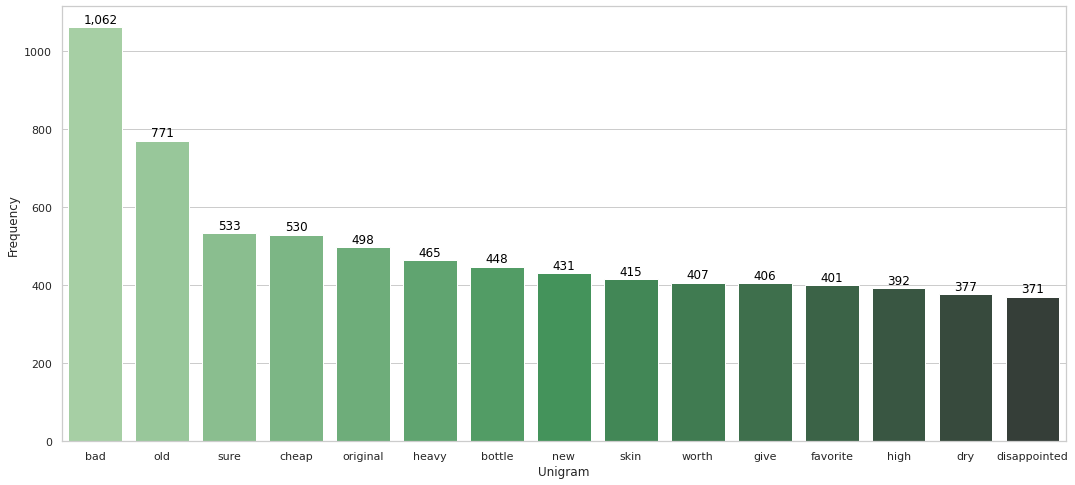

In [126]:
plt.figure(figsize=(18,8))
ax1 = sns.barplot(data=df_freq, x='Unigram', y='Frequency',palette='Greens_d')
for index, value in enumerate(df_freq['Frequency']):
    ax1.text(index - .17, value + 10, "{:,.0f}".format(value), color='black');

#### **Positive**

In [127]:
words_positive = get_top_n_words(df_positive['Review_Final'], 15)
df_freq_positive = pd.DataFrame(words_positive, columns = ['Unigram', 'Frequency'])
df_freq_positive.sort_values(ascending = False, by='Frequency')

,Unigram,Frequency
0,perfect,3876
1,favorite,3190
2,new,3036
3,soft,1924
4,best,1816
5,unique,1613
6,sexy,1443
7,everyday,1338
8,happy,1320
9,complimentary,1247


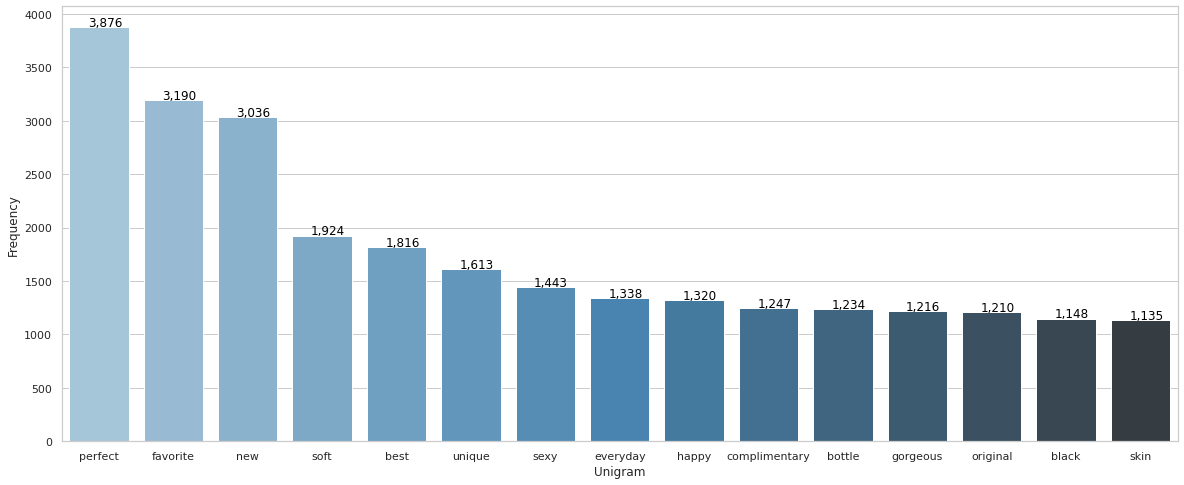

In [128]:
plt.figure(figsize=(20,8))
ax1 = sns.barplot(data=df_freq_positive, x='Unigram', y='Frequency',palette='Blues_d')
for index, value in enumerate(df_freq_positive['Frequency']):
    ax1.text(index - .15, value + 10, "{:,.0f}".format(value), color='black');

### **Word Cloud**

In [129]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [131]:
#Creating the text variable
text_negative = " ".join(cat for cat in df_negative.Review_Final)
text_positive = " ".join(cat for cat in df_positive.Review_Final)

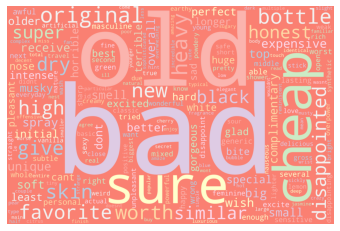

In [132]:
#Generate word cloud (Negative)
word_cloud_negative = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text_negative)
# Display the generated Word Cloud
plt.imshow(word_cloud_negative)
plt.axis("off")
plt.show()

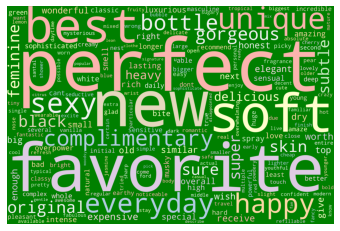

In [133]:
#Generate word cloud (Positive)
word_cloud_positive = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="green",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text_positive)
# Display the generated Word Cloud
plt.imshow(word_cloud_positive)
plt.axis("off")
plt.show()